In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import myModule
from myModule.interactions import newton, chandrasekhar

In [2]:
## Units
# Mass:     10**6 Solar Masses
# Distance: Parsecs
# Time:     Megayears

## Constants

G = 4490.0             # Gravitational constant
lnLamb = 1.0           # Coulomb logarithm
sigma = 76.65          # Velocity dispersion
M_bh = 3.0             # BlackHole mass
M_tot = 2.0*M_bh       # Total mass
R = G*M_bh/(sigma**2)  # BlackHole radius

## Density and Mass function for the gas as numpy functions

def M_gas(r):
    return 2.0*sigma*sigma*(r-R*np.arctan(r/R))/G

def rho_gas(r):
    return sigma*sigma/(2.0*np.pi*G*(r*r+R*R))

In [3]:
mySim = myModule.simulation('odeint')
gravity = myModule.interaction('Newtonian Gravity', newton.acceleration, G = G, m = M_gas)
friction = myModule.interaction('Dynamical Friction', chandrasekhar.acceleration, G = G, m = M_tot, logLambda = lnLamb, rho = rho_gas, sigma = sigma )
mySim.interactions.append(gravity)
mySim.interactions.append(friction)
mySim.updateAcceleration()

100000.0


/usr/lib/python3.5/site-packages/scipy/integrate/odepack.py:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(0.01, 1000.0)

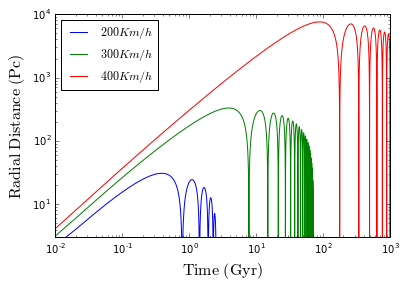

In [4]:
t_i = 0
t_f = 1000
dt = 0.01

print((t_f-t_i)/dt)

for v in [200, 300, 400]:
    s_0 = np.array([1.0, 0, 0, 0, 0 ,v*1.022])
    mySim.integrate(s_0, t_i, t_f, dt)
    r = np.sqrt(np.sum(mySim.path[:,:3]**2, axis = 1))
    plt.plot(np.arange(t_i,t_f,dt), r , label = '$%d Km/h$' % v)

plt.legend(loc=2)
plt.xlabel('$\mathrm{Time\ (Gyr)}$',fontsize=16)
plt.ylabel('$\mathrm{Radial\ Distance\ (Pc)}$',fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=3)
plt.xlim(xmin=10**(-2))